Problem statement:

-You are required to model the price of houses with the available independent variables

In [1]:
#linear algebra

import numpy as np

#data processing

import pandas as pd

#data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#algorithms

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor

#importing metrics

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [2]:
#loading the data

test_df = pd.read_csv(r"C:\Users\Yash Bhardwaj\Downloads\Project-Housing--2---1-\Project-Housing_splitted\test.csv")
train_df = pd.read_csv(r"C:\Users\Yash Bhardwaj\Downloads\Project-Housing--2---1-\Project-Housing_splitted\train.csv")

print(test_df.shape)
print(train_df.shape)

(292, 80)
(1168, 81)


# Data Exploration/Analysis:

In [8]:
#getting info

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

- The training-set has 1168 examples and 80 features + the target variable (SalePrice). 3 of the features are floats, 35 are integers and 43 are objects.

In [12]:
#checking out a few sample from the training-set

pd.set_option('display.max_columns',None)
train_df.sample(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
656,1220,160,RM,21.0,1680,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,Twnhs,2Story,6,5,1971,1971,Gable,CompShg,CemntBd,CmentBd,BrkFace,236.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,672,672,GasA,TA,Y,SBrkr,672,546,0,1218,0,0,1,1,3,1,TA,7,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,201,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,91500
911,765,120,RL,30.0,9549,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Veenker,Norm,Norm,TwnhsE,1Story,8,5,1995,1996,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,Gd,PConc,Gd,Gd,Av,LwQ,437,GLQ,1057,0,1494,GasA,Ex,Y,SBrkr,1494,0,0,1494,1,0,1,1,2,1,Ex,6,Typ,1,Gd,Attchd,1995.0,Fin,2,481,TA,TA,Y,0,30,0,0,216,0,NaN,NaN,NaN,0,4,2006,WD,Normal,270000
467,42,20,RL,115.0,16905,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,5,6,1959,1959,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,967,Unf,0,383,1350,GasA,Gd,Y,SBrkr,1328,0,0,1328,0,1,1,1,2,1,TA,5,Typ,2,Gd,Attchd,1959.0,RFn,1,308,TA,TA,P,0,104,0,0,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal,170000
1026,544,120,RH,34.0,4058,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,TwnhsE,SFoyer,7,5,1998,1998,Gable,CompShg,MetalSd,MetalSd,BrkFace,182.0,TA,TA,PConc,Gd,TA,Av,GLQ,584,LwQ,139,0,723,GasA,Ex,Y,SBrkr,767,0,0,767,1,0,1,0,1,1,TA,4,Typ,0,NaN,Attchd,1998.0,Fin,1,367,TA,TA,Y,120,40,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,133000
1088,882,50,RL,44.0,13758,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Timber,Norm,Norm,1Fam,1.5Fin,7,5,1990,1991,Gable,CompShg,HdBoard,HdBoard,BrkFace,117.0,Gd,Gd,CBlock,Gd,TA,Mn,LwQ,902,Unf,0,254,1156,GasA,Ex,Y,SBrkr,1187,530,0,1717,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,1990.0,RFn,2,400,TA,TA,Y,168,36,0,0,0,0,NaN,NaN,NaN,0,4,2007,WD,Normal,187500
1134,894,20,RL,NaN,13284,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,PosN,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Mn,BLQ,1064,Unf,0,319,1383,GasA,TA,Y,SBrkr,1383,0,0,1383,1,0,1,0,3,1,TA,6,Typ,1,Gd,Attchd,1954.0,Unf,1,354,TA,TA,Y,511,116,0,0,0,0,NaN,GdPrv,NaN,0,6,2008,WD,Normal,165000
669,20,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1958,1965,Hip,CompShg,BrkFace,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,LwQ,504,Unf,0,525,1029,GasA,TA,Y,SBrkr,1339,0,0,1339,0,0,1,0,3,1,TA,6,Min1,0,NaN,Attchd,1958.0,Unf,1,294,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2009,COD,Abnorml,139000
296,158,60,RL,92.0,12003,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Timber,Norm,Norm,1Fam,2Story,8,5,2009,2010,Gable,CompShg,VinylSd,VinylSd,BrkFace,84.0,Gd,TA,PConc,Ex,TA,No,Unf,0,Unf,0,774,774,GasA,Ex,Y,SBrkr,774,1194,0,1968,0,0,2,1,4,1,Ex,8,Typ,1,Gd,BuiltIn,2009.0,Fin,3,680,TA,TA,Y,0,75,0,0,0,0,NaN,NaN,NaN,0,5,2010,New,Partial,269500
1023,199,75,RM,92.0,5520,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2.5Fin,6,6,1912,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,755,755,GasA,Ex,Y,SBrkr,929,929,371,2229,0,0,1,0,5,1,TA,8,Typ,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,198,30,0,0,0,NaN,MnPrv,NaN,0,7,2009,WD,Abnorml,104000
660,1024,120,RL,43.0,3182,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,14.0,Gd,TA,PConc,Gd,Gd,No,GLQ,1

In [13]:
#describing the dataset

train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1168.000000,1168.000000,954.00000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1161.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1104.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,724.136130,56.767979,70.98847,10484.749144,6.104452,5.595890,1970.930651,1984.758562,102.310078,444.726027,46.647260,569.721747,1061.095034,1169.860445,348.826199,6.380137,1525.066781,0.425514,0.055651,1.562500,0.388699,2.884418,1.045377,6.542808,0.617295,1978.193841,1.776541,476.860445,96.206336,46.559932,23.015411,3.639555,15.051370,3.448630,47.315068,6.344178,2007.804795,181477.005993
std,416.159877,41.940650,24.82875,8957.442311,1.390153,1.124343,30.145255,20.785185,182.595606,462.664785,163.520016,449.375525,442.272249,391.161983,439.696370,50.892844,528.042957,0.521615,0.236699,0.551882,0.504929,0.817229,0.216292,1.598484,0.650575,24.890704,0.745554,214.466769,126.158988,66.381023,63.191089,29.088867,55.080816,44.896939,543.264432,2.686352,1.329738,79105.586863
min,1.000000,20.000000,21.00000,1300.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,360.500000,20.000000,60.00000,7621.500000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,799.000000,892.000000,0.000000,0.000000,1143.250000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,338.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,130375.000000
50%,714.500000,50.000000,70.00000,9522.500000,6.000000,5.000000,1972.000000,1993.000000,0.000000,385.500000,0.000000,474.000000,1005.500000,1096.500000,0.000000,0.000000,1468.500000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163995.000000
75%,1079.500000,70.000000,80.00000,11515.500000,7.000000,6.000000,2000.000000,2004.000000,160.000000,714.500000,0.000000,816.000000,1291.500000,1392.000000,729.000000,0.000000,1795.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,171.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,215000.000000
max,1460.000000,190.000000,313.00000,164660.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [ ]:
Above we can see that sale price has a mean of 181477.005993  dollars. We can also see OverallQual , OverallCond ranges from 1 to 10 and 1 to 9, respectively. On top of that we can already detect some features, that contain missing values, like the ‘LoatArea’ feature.

In [21]:
#checking for missing values

for i in train_df.columns:
    if train_df[i].isnull().sum()>0:
        print(i,':',train_df[i].isnull().sum())

LotFrontage : 214
Alley : 1091
MasVnrType : 7
MasVnrArea : 7
BsmtQual : 30
BsmtCond : 30
BsmtExposure : 31
BsmtFinType1 : 30
BsmtFinType2 : 31
FireplaceQu : 551
GarageType : 64
GarageYrBlt : 64
GarageFinish : 64
GarageQual : 64
GarageCond : 64
PoolQC : 1161
Fence : 931
MiscFeature : 1124


In [22]:
train_df.shape

(1168, 81)

In [3]:
#checking about unique values present

for i in train_df.columns:
    print(train_df[i].value_counts(),'\n\n')

127     1
1391    1
1389    1
448     1
1179    1
       ..
1402    1
661     1
101     1
415     1
617     1
Name: Id, Length: 1168, dtype: int64 


20     428
60     244
50     113
120     69
70      53
30      52
160     47
80      43
90      41
190     26
85      19
75      14
45      10
180      6
40       3
Name: MSSubClass, dtype: int64 


RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64 


60.0     111
80.0      60
70.0      58
75.0      46
50.0      44
        ... 
102.0      1
144.0      1
112.0      1
149.0      1
153.0      1
Name: LotFrontage, Length: 106, dtype: int64 


9600     21
7200     18
6000     16
8400     14
9000     11
         ..
12803     1
9480      1
13478     1
12122     1
7861      1
Name: LotArea, Length: 892, dtype: int64 


Pave    1164
Grvl       4
Name: Street, dtype: int64 


Grvl    41
Pave    36
Name: Alley, dtype: int64 


Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int

# EDA:

In [3]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

- To me it would make sense that 'OverallQual' , 'Fireplaces' , 'Yearbuilt' would have high correlation with the target variable i.e. 'SalePrice' , So I am going to check out correlation matrix with respect to the target variable to for checking out the correlation thus, relationship of feature variables with target variable.

In [11]:
#checking out the correlation bond

train_df.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.132108
EnclosedPorch   -0.115004
OverallCond     -0.065642
MSSubClass      -0.060775
YrSold          -0.045508
LowQualFinSF    -0.032381
Id              -0.023897
MiscVal         -0.013071
BsmtHalfBath    -0.011109
BsmtFinSF2      -0.010151
3SsnPorch        0.060119
MoSold           0.072764
ScreenPorch      0.100284
PoolArea         0.103280
BedroomAbvGr     0.158281
BsmtFullBath     0.212924
BsmtUnfSF        0.215724
LotArea          0.249499
HalfBath         0.295592
WoodDeckSF       0.315444
2ndFlrSF         0.330386
OpenPorchSF      0.339500
LotFrontage      0.341294
BsmtFinSF1       0.362874
Fireplaces       0.459611
MasVnrArea       0.466386
GarageYrBlt      0.474346
YearRemodAdd     0.507831
YearBuilt        0.514408
TotRmsAbvGrd     0.528363
FullBath         0.554988
1stFlrSF         0.587642
TotalBsmtSF      0.595042
GarageArea       0.619000
GarageCars       0.628329
GrLivArea        0.707300
OverallQual      0.789185
SalePrice        1.000000
Name: SalePr

- OverallQual has a very high correlation bond with the target variable , in other words OverallQual is clearly a cruical feature in predicting the sale price
- living area in square feet seems to be another important feature.
- Garage car capacity , Garage area , size of first floor and total basement has a good correlation bond with SalePrice
- Month the house got sold and three season porch area seems to be having a very weak correlation bond with the target variable
- Type 2 finish , basement half bathrooms , Value of Misc feature , Id , Low quality finish , Year sold , MSSubClass , OverallCond are weakly and negatively connected to the target variable i.e 'SalePrice'
- Kitchens above grade and enclosed porch area are negatively related to sale price

1. Id and SalePrice

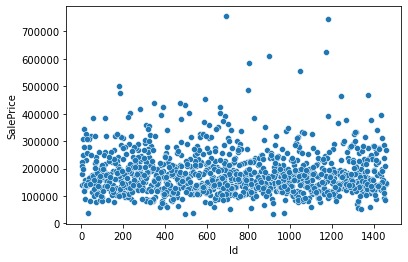

In [5]:
sns.scatterplot('Id','SalePrice',data=train_df)
plt.show()

- Weak correlation with Saleprice as the slope is almost zero

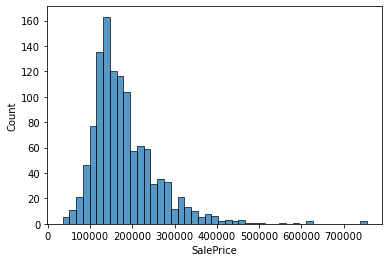

In [6]:
sns.histplot(train_df['SalePrice'])
plt.show()

- Sale price data hasn't been distributed uniformly

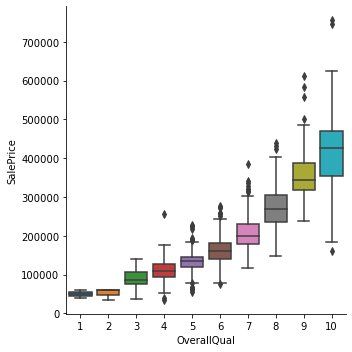

In [18]:
sns.catplot('OverallQual','SalePrice',data=train_df,kind='box')
plt.show()

- The most important feature , Over all quality 10 has the highest prices , OverAllQual has a linear relationship with Sale price

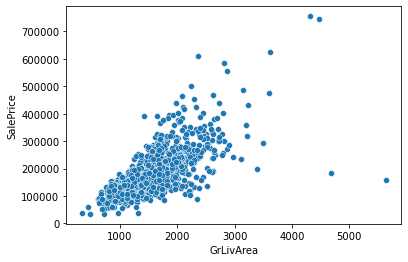

In [20]:
sns.scatterplot('GrLivArea','SalePrice',data=train_df)
plt.show()

- GrLivArea is also highly correlated with the target variable , as higher the GrLivArea higher the prices

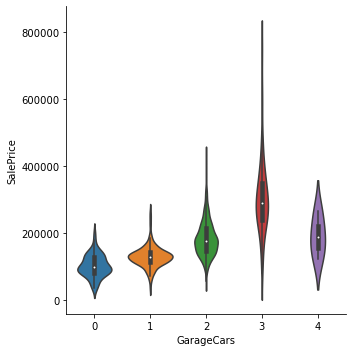

In [22]:
sns.catplot('GarageCars','SalePrice',data=train_df,kind='violin')
plt.show()

- Garage Cars capacity 3 has the highest prices

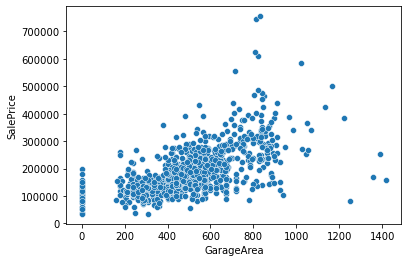

In [23]:
sns.scatterplot('GarageArea','SalePrice',data=train_df)
plt.show()

- Higher the Garage Area higher the chances of higher sale prices

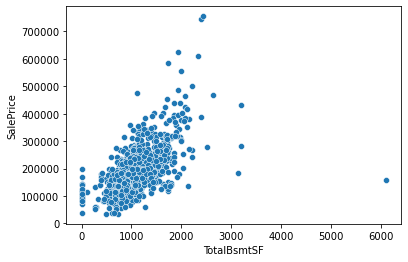

In [4]:
sns.scatterplot('TotalBsmtSF','SalePrice',data=train_df)
plt.show()

- though the data distribution for TotalBsmtSF has a low range but in that range higher the TotalBsmtSF higher the sale prcices

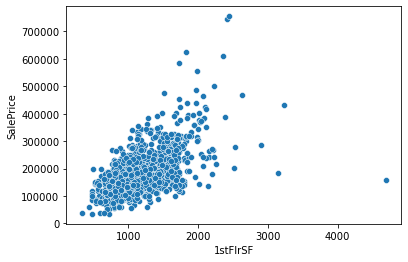

In [25]:
sns.scatterplot('1stFlrSF','SalePrice',data=train_df)
plt.show()

- same goes with first floor size

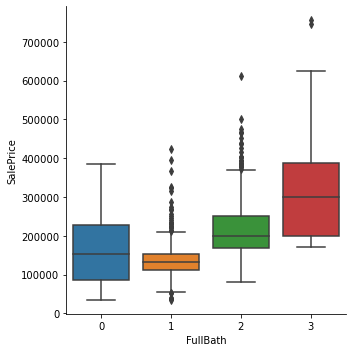

In [27]:
sns.catplot('FullBath','SalePrice',data=train_df,kind='box')
plt.show()

- 0 full bathrooms has a wide range of data than 1 and 2 full bathrooms , though house with 3 full bathrooms have the highest prices

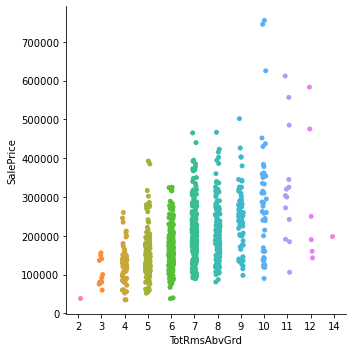

In [30]:
sns.catplot('TotRmsAbvGrd','SalePrice',data=train_df)
plt.show()

10 totalrooms above grade has the highest sale prices

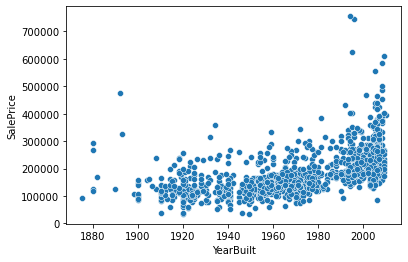

In [31]:
sns.scatterplot('YearBuilt','SalePrice',data=train_df)
plt.show()

- later the house has been built higher its sale price is.

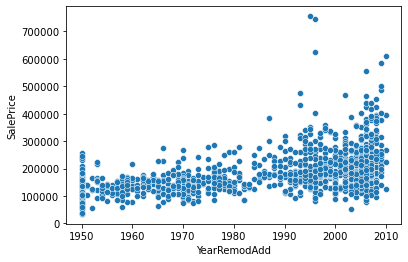

In [32]:
sns.scatterplot('YearRemodAdd','SalePrice',data=train_df)
plt.show()

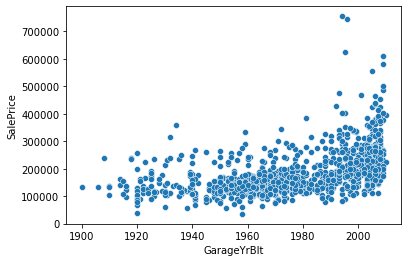

In [34]:
sns.scatterplot('GarageYrBlt','SalePrice',data=train_df)
plt.show()

- whether it is the house itself or its parts like garage the later it has been built the higher the prices are seem to be 
- But , year 1992-1995 having to be the highest sale prices

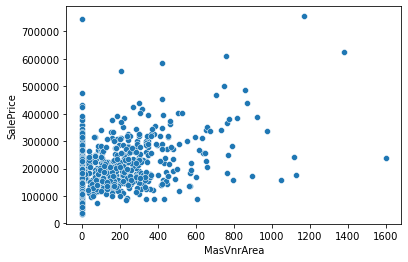

In [36]:
sns.scatterplot('MasVnrArea','SalePrice',data=train_df)
plt.show()

- the correlation isn't strong with MasVnrArea as the data is distibuted around bottom half only

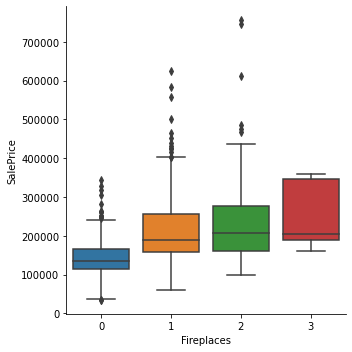

In [38]:
sns.catplot('Fireplaces','SalePrice',data=train_df,kind='box')
plt.show()

- 2 fireplaces in  the house seems to have the highest prices

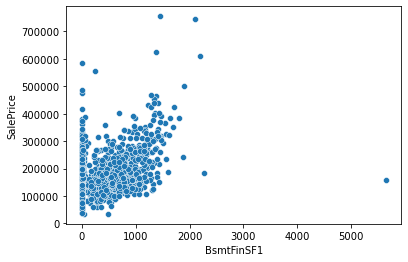

In [39]:
sns.scatterplot('BsmtFinSF1','SalePrice',data=train_df)
plt.show()

- BsmtFinSF1 0 have a wide range of data , from 0 to 1900 BsmtFinSF1 the sale prices are increasing

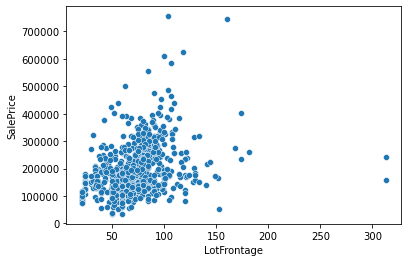

In [41]:
sns.scatterplot('LotFrontage','SalePrice',data=train_df)
plt.show()

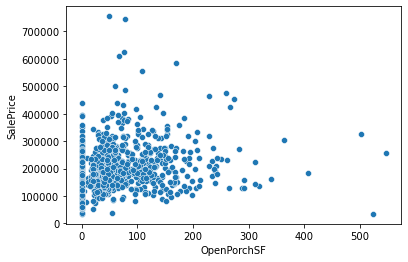

In [42]:
sns.scatterplot('OpenPorchSF','SalePrice',data=train_df)
plt.show()

- the relationship is linear for very small range of OpenPorchSF

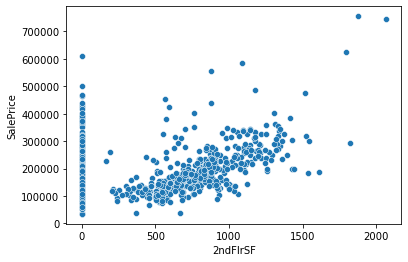

In [44]:
sns.scatterplot('2ndFlrSF','SalePrice',data=train_df)
plt.show()

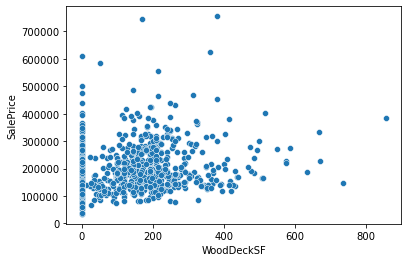

In [45]:
sns.scatterplot('WoodDeckSF','SalePrice',data=train_df)
plt.show()

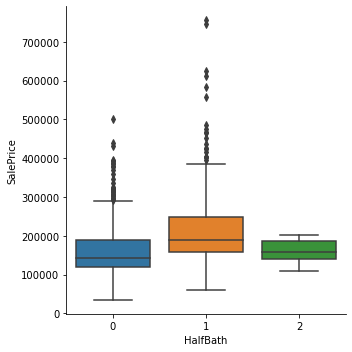

In [46]:
sns.catplot('HalfBath','SalePrice',data=train_df,kind='box')
plt.show()

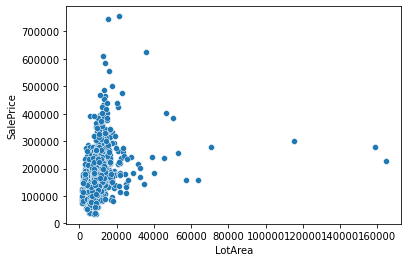

In [47]:
sns.scatterplot('LotArea','SalePrice',data=train_df)
plt.show()

- larger lot area have lower prices

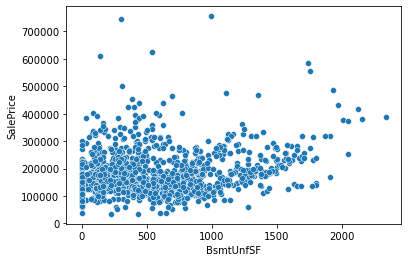

In [48]:
sns.scatterplot('BsmtUnfSF','SalePrice',data=train_df)
plt.show()

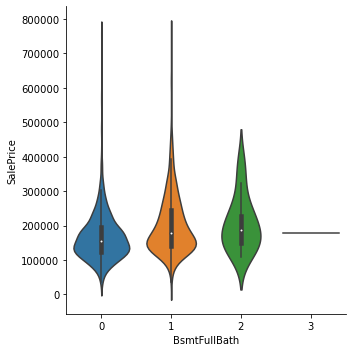

In [50]:
sns.catplot('BsmtFullBath','SalePrice',data=train_df,kind='violin')
plt.show()

# Data Preprocessing:

In [17]:
#dropping Id feature as it doesn't have much value in predicting the response

train_df = train_df.drop(['Id'], axis=1)

In [18]:
#checking for missing values


for i in train_df.columns:
    if train_df[i].isnull().sum()>0:
        print(i,':',train_df[i].isnull().sum())
        print(train_df[i].dtypes,'\n')

LotFrontage : 214
float64 

Alley : 1091
object 

MasVnrType : 7
object 

MasVnrArea : 7
float64 

BsmtQual : 30
object 

BsmtCond : 30
object 

BsmtExposure : 31
object 

BsmtFinType1 : 30
object 

BsmtFinType2 : 31
object 

FireplaceQu : 551
object 

GarageType : 64
object 

GarageYrBlt : 64
float64 

GarageFinish : 64
object 

GarageQual : 64
object 

GarageCond : 64
object 

PoolQC : 1161
object 

Fence : 931
object 

MiscFeature : 1124
object 



In [67]:
#checking for missing values

for i in test_df.columns:
    if test_df[i].isnull().sum()>0:
        print(i,':',test_df[i].isnull().sum())
        print(test_df[i].dtypes,'\n')

LotFrontage : 45
float64 

Alley : 278
object 

MasVnrType : 1
object 

MasVnrArea : 1
float64 

BsmtQual : 7
object 

BsmtCond : 7
object 

BsmtExposure : 7
object 

BsmtFinType1 : 7
object 

BsmtFinType2 : 7
object 

Electrical : 1
object 

FireplaceQu : 139
object 

GarageType : 17
object 

GarageYrBlt : 17
float64 

GarageFinish : 17
object 

GarageQual : 17
object 

GarageCond : 17
object 

PoolQC : 292
float64 

Fence : 248
object 

MiscFeature : 282
object 



- the dataset has an count of 1168 examples , MiscFeature , PoolQC , Alley , Fence have equal to more than 80% missing data , so I am going to drop these from both training and test dataset , as there is no point in imputing them with their respective mode or most frequent value as the data will be biased

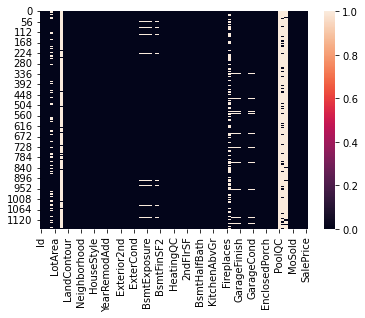

In [3]:
#checking for null values in training set

sns.heatmap(train_df.isnull())
plt.show()

In [19]:
#dropping these above variables

train_df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)
test_df.drop(['Alley','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)

In [8]:
miss_cat=[]          #creating empty list for training categorical feature with missing values
miss_int=[]          #creating empty list for training numerical feature with missing values
for i in train_df.columns:
    if train_df[i].isnull().sum()>0 and train_df[i].dtypes=='object':
        miss_cat.append(i)
    elif train_df[i].isnull().sum()>0 and train_df[i].dtypes=='float64':
        miss_int.append(i)
        
miss_cat_test=[]     #creating empty list for testing categorical feature with missing values
miss_int_test=[]     ##creating empty list for testing numerical feature with missing values
for j in test_df.columns:
    if test_df[j].isnull().sum()>0 and test_df[j].dtypes=='object':
        miss_cat_test.append(j)
    elif test_df[j].isnull().sum()>0 and test_df[j].dtypes=='float64':
        miss_int_test.append(j)

- Here I have used SimpleImputer to fill those missing values
- for categorical features SimpleImputer with strategy as most frequent or mode of the data is going to be used
- for numerical features SimpleImputer with strategy as mean of the data is going to be used

In [9]:
from sklearn.impute import SimpleImputer     #importing SimpleImputer

for i in miss_cat:
    train_df[i]=SimpleImputer(strategy='most_frequent').fit_transform(train_df[i].values.reshape(-1,1)) 
    
for j in miss_int:    
    train_df[j]=SimpleImputer(strategy='mean').fit_transform(train_df[j].values.reshape(-1,1))
    
for k in miss_cat_test:
    test_df[k]=SimpleImputer(strategy='most_frequent').fit_transform(test_df[k].values.reshape(-1,1))
    
for l in miss_int_test:    
    test_df[l]=SimpleImputer(strategy='mean').fit_transform(test_df[l].values.reshape(-1,1))

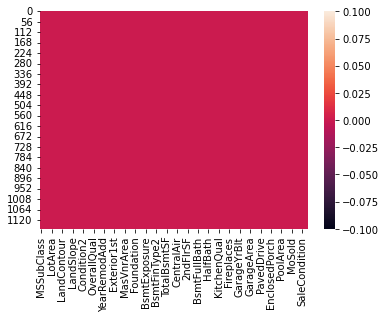

In [77]:
#checking for null values in training set

sns.heatmap(train_df.isnull())
plt.show()

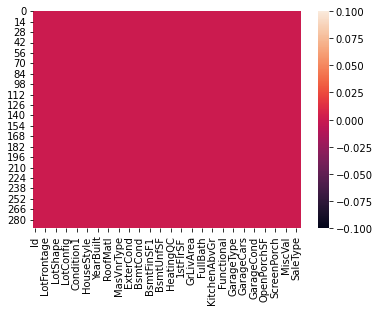

In [78]:
#checking for null values in testing-set

sns.heatmap(test_df.isnull())
plt.show()

- Now as the missing values have been replaced in both the sets , we can convert the categorical features into numeric one , for this I am going to use LabelEncoder

In [20]:
cat=[]                     #creating empty list for categorical variable from training set
for i in train_df.columns:
    if train_df[i].dtypes=='object':
        cat.append(i)
         
cat_test=[]                #creating empty list for categorical variable from training set
for j in test_df.columns:
    if test_df[j].dtypes=='object':
        cat_test.append(j)

In [21]:
from sklearn.preprocessing import LabelEncoder    #importing LabelEncoder

for i in cat:
    train_df[i]=LabelEncoder().fit_transform(train_df[i])
    
for j in cat_test:
    test_df[j]=LabelEncoder().fit_transform(test_df[j])

In [12]:
#checking out correlation matrix again as all the features are numeric now

corr=train_df.corr()['SalePrice'].sort_values()
corr=pd.DataFrame(corr)
corr.tail(18)

,SalePrice
OpenPorchSF,0.339500
BsmtFinSF1,0.362874
Foundation,0.374169
GarageYrBlt,0.458007
Fireplaces,0.459611
MasVnrArea,0.463626
YearRemodAdd,0.507831
YearBuilt,0.514408
TotRmsAbvGrd,0.528363
FullBath,0.554988


# Feature Selection:

- As 'Utilities' is showing NaN correlation with the traget variable , I am going to drop it from both train and test data

In [43]:
X_train = train_df.drop(["SalePrice"], axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop(["Id"], axis=1).copy()

# Building Models:

1. Linear Regression

In [ ]:
#LinearRegression

lr=LinearRegression()
lr.fit(X_train,Y_train)
predlr=lr.predict(X_test)
acc_lr=lr.score(X_train,Y_train)
acc_lr

2. Regularization
- Lasso
- Ridge

In [95]:
#Lasso

ls=Lasso()
ls.fit(X_train,Y_train)
predls=ls.predict(X_test)
acc_ls=ls.score(X_train,Y_train)
acc_ls

0.8363109216137934

In [96]:
#Ridge

lrr=Ridge()
lrr.fit(X_train,Y_train)
predlrr=lrr.predict(X_test)
acc_lrr=lrr.score(X_train,Y_train)
acc_lrr

0.8362944229769591

3. K-Nearest_Neighbors

In [99]:
#KNeighbors

knn=KNeighborsRegressor()
knn.fit(X_train,Y_train)
predknn=knn.predict(X_test)
acc_knn=knn.score(X_train,Y_train)
acc_knn

0.7620991766485199

4. Ensemble
- Ada Boost
- Random Forest
- Gradient Boosting

In [101]:
#AdaBoost

ada=AdaBoostRegressor()
ada.fit(X_train,Y_train)
predada=ada.predict(X_test)
acc_ada=ada.score(X_train,Y_train)
acc_ada

0.8713451607478098

In [110]:
#RandomForest

rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
predrf=rf.predict(X_test)
acc_rf=rf.score(X_train,Y_train)
acc_rf

0.978546243162069

In [98]:
#Gradient Boosting

gbr=GradientBoostingRegressor()
gbr.fit(X_train,Y_train)
predgbr=gbr.predict(X_test)
acc_gbr=gbr.score(X_train,Y_train)
acc_gbr

0.9674168693199413

# Best Model?

In [104]:
results = pd.DataFrame({'Model': ['Linear Regression','Lasso','Ridge','KNN','Ada Boost','Random Forest','Gradient Boosting'],'Score': [acc_lr*100,acc_ls*100,acc_lrr*100,acc_knn*100,acc_ada*100,acc_rf*100,acc_gbr*100]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
97.973641,Random Forest
96.741687,Gradient Boosting
87.134516,Ada Boost
83.631103,Linear Regression
83.631092,Lasso
83.629442,Ridge
76.209918,KNN


- As we can see, the Random Forest regressor goes on the first place. But first, let us check, how random-forest performs, when we use cross validation.

In [46]:
rf = RandomForestRegressor()

In [108]:
#Cross validation for Random Forest

rf = RandomForestRegressor()
scores = cross_val_score(rf, X_train, Y_train, cv=10)
print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std())

Scores: [0.87786402 0.89258741 0.86888924 0.65629995 0.91224612 0.74175333
 0.86003129 0.92597692 0.85211491 0.82860826] 

Mean: 0.841637145713736 

Standard Deviation: 0.07854574936370462


- This looks much more realistic than before. Our model has a average accuracy of 84% with a standard deviation of 7 %. The standard deviation shows us, how precise the estimates are .
- This means in our case that the accuracy of our model can differ + — 7%.

# Feature Importance:

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

- only OverallQual and GrLivArea have good feature importance

<AxesSubplot:xlabel='feature'>

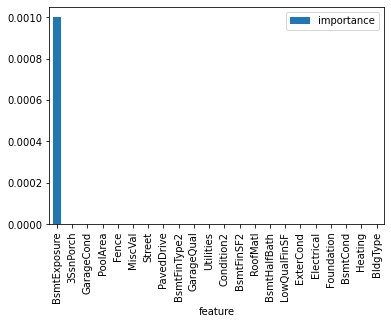

In [120]:
importances.tail(22).plot.bar()

- Many feature have zero importance

In [123]:
drop=importances.tail(21)     #features with Zero importance
drop

,importance
feature,
3SsnPorch,0.0
GarageCond,0.0
PoolArea,0.0
Fence,0.0
MiscVal,0.0
Street,0.0
PavedDrive,0.0
BsmtFinType2,0.0
GarageQual,0.0


In [127]:
drop.index

Index(['3SsnPorch', 'GarageCond', 'PoolArea', 'Fence', 'MiscVal', 'Street',
       'PavedDrive', 'BsmtFinType2', 'GarageQual', 'Utilities', 'Condition2',
       'BsmtFinSF2', 'RoofMatl', 'BsmtHalfBath', 'LowQualFinSF', 'ExterCond',
       'Electrical', 'Foundation', 'BsmtCond', 'Heating', 'BldgType'],
      dtype='object', name='feature')

In [49]:
#dropping the zero feature importance

In [129]:
train_df=train_df.drop(['3SsnPorch', 'GarageCond', 'PoolArea', 'Fence', 'MiscVal', 'Street',
       'PavedDrive', 'BsmtFinType2', 'GarageQual', 'Utilities', 'Condition2',
       'BsmtFinSF2', 'RoofMatl', 'BsmtHalfBath', 'LowQualFinSF', 'ExterCond',
       'Electrical', 'Foundation', 'BsmtCond', 'Heating', 'BldgType'],axis=1)

test_df=test_df.drop(['3SsnPorch', 'GarageCond', 'PoolArea', 'Fence', 'MiscVal', 'Street',
       'PavedDrive', 'BsmtFinType2', 'GarageQual', 'Utilities', 'Condition2',
       'BsmtFinSF2', 'RoofMatl', 'BsmtHalfBath', 'LowQualFinSF', 'ExterCond',
       'Electrical', 'Foundation', 'BsmtCond', 'Heating', 'BldgType'],axis=1)

In [131]:
X_train = train_df.drop("SalePrice", axis=1)
Y_train = train_df["SalePrice"]
X_test  = test_df.drop(['Id'],axis=1)

In [132]:
# Random Forest

random_forest = RandomForestRegressor(n_estimators=100, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

98.16 %


In [134]:
#out of bag sample score

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 85.99 %


# Hyperparameter Tuning:

In [139]:
param_grid = { "criterion" : ["squared_error", "absolute_error", "poisson"], "min_samples_leaf" : [1, 5, 10], "min_samples_split" : [2, 4, 10]}
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
rf = RandomForestRegressor(n_estimators=100, max_features='auto', oob_score=True, random_state=1, n_jobs=-1)
clf = HalvingGridSearchCV(estimator=rf, param_grid=param_grid)
clf.fit(X_train, Y_train)
clf.best_params_

{'criterion': 'squared_error', 'min_samples_leaf': 1, 'min_samples_split': 2}

In [141]:
# Random Forest
random_forest = RandomForestRegressor(criterion = 'squared_error', 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 2, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

print("oob score:", round(random_forest.oob_score_, 4)*100, "%")

oob score: 86.81 %


oob score has been increased after hyperparameter tuning

# Evaluation:

In [142]:
from sklearn.model_selection import cross_val_predict
predictions = cross_val_predict(random_forest, X_train, Y_train, cv=3)

1. Mean Absolute Error

In [145]:
print('MAE:',mean_absolute_error(Y_train,predictions))

MAE: 18169.7277739726


2. Mean Squared Error

In [146]:
print('MSE:',mean_squared_error(Y_train,predictions))

MSE: 890304588.7224373


3. R squared score

In [148]:
print('r2_score:',r2_score(Y_train,predictions)*100)

r2_score: 85.76044934360606


4. Root Mean Squared Error

In [149]:
print('RMSE:',np.sqrt(mean_squared_error(Y_train,predictions)))

RMSE: 29837.972262243915


5. Root Mean Squared Log Error

In [152]:
print('RMSLE:',np.log(np.sqrt(mean_squared_error(Y_train,predictions))))

RMSLE: 10.303537098330589


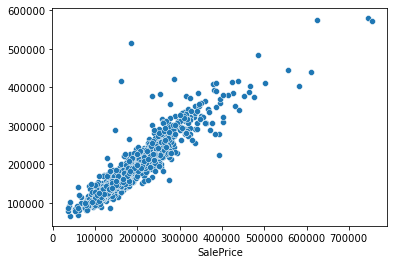

In [151]:
sns.scatterplot(Y_train,predictions)
plt.show()

In [153]:
preddf=pd.DataFrame({'Sale Price':Y_train,'Predicted Sale Price':predictions})
preddf

,Sale Price,Predicted Sale Price
0,128000,137551.88
1,268000,304833.17
2,269790,242290.65
3,190000,202726.50
4,215000,193206.50
...,...,...
1163,122000,123064.42
1164,108000,126311.75
1165,148500,157063.40
1166,40000,103755.02
